In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_base = pd.read_csv("agent_47_base/train_stats.csv")
df = pd.read_csv("agent_47/train_stats.csv")

print("df sommaire")
display( df.describe() )

print("df valeurs manquantes")
display( df.isna().sum().to_frame().T )

print("df valeurs dupliqueess")
dup = df.duplicated(keep="last")
display( df[dup] )

df sommaire


,Id,Episode,EpisodeLength,Score,CumulativeReward,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean
count,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,3.000000e+04,3.000000e+04
mean,0.0,14999.500000,2.908767,0.046433,-28.938000,0.027669,0.049631,0.0,3.053141e+09,6.493348e+08
std,0.0,8660.398374,5.995407,0.236105,5.446694,0.026084,0.090918,0.0,5.296242e+10,1.101682e+10
min,0.0,0.000000,2.000000,0.000000,-30.000000,0.025000,0.016547,0.0,0.000000e+00,0.000000e+00
25%,0.0,7499.750000,2.000000,0.000000,-30.000000,0.025000,0.034479,0.0,3.417443e+03,1.679426e+03
50%,0.0,14999.500000,2.000000,0.000000,-30.000000,0.025000,0.035623,0.0,1.227445e+04,6.012029e+03
75%,0.0,22499.250000,2.000000,0.000000,-30.000000,0.025000,0.038844,0.0,1.676585e+05,9.011643e+04
max,0.0,29999.000000,145.000000,5.000000,70.000000,0.500000,2.341949,0.0,2.435662e+12,4.633386e+11


df valeurs manquantes


,Id,Episode,EpisodeLength,Score,CumulativeReward,CauseOfTermination,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean
0,0,0,0,0,0,0,0,0,0,0,0


df valeurs dupliqueess


,Id,Episode,EpisodeLength,Score,CumulativeReward,CauseOfTermination,Epsilon,EpisodeDuration,TrainLossMin,TrainLossMax,TrainLossMean


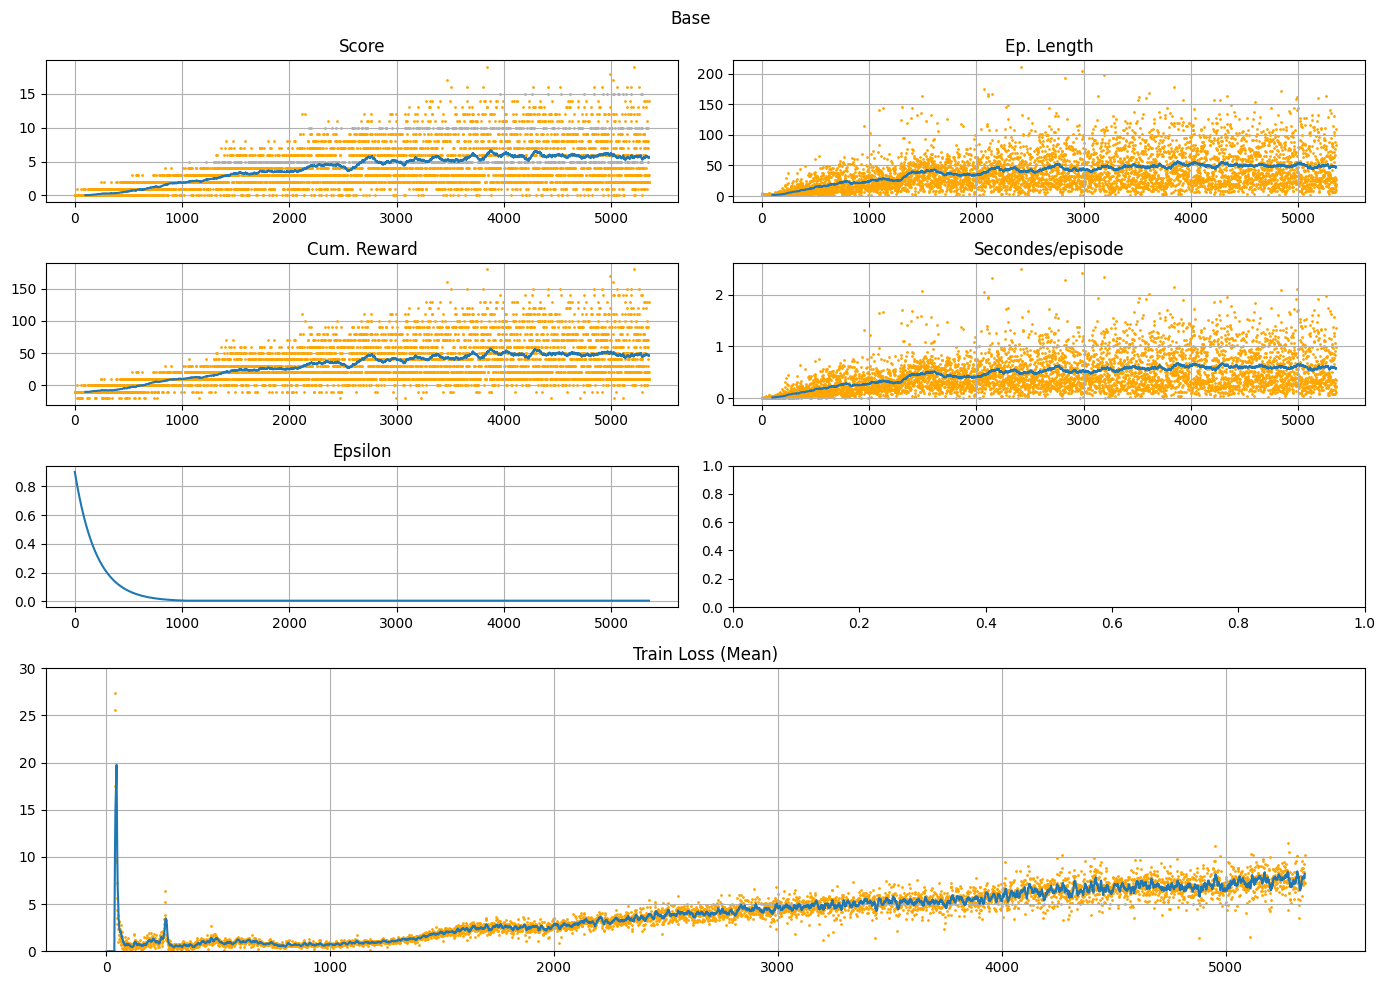

Total time: 2488.03
Max Score: 19 a 3840
Max Cum. Reward: 180.0 a 3840
Max Ep. Length: 211 a 2416


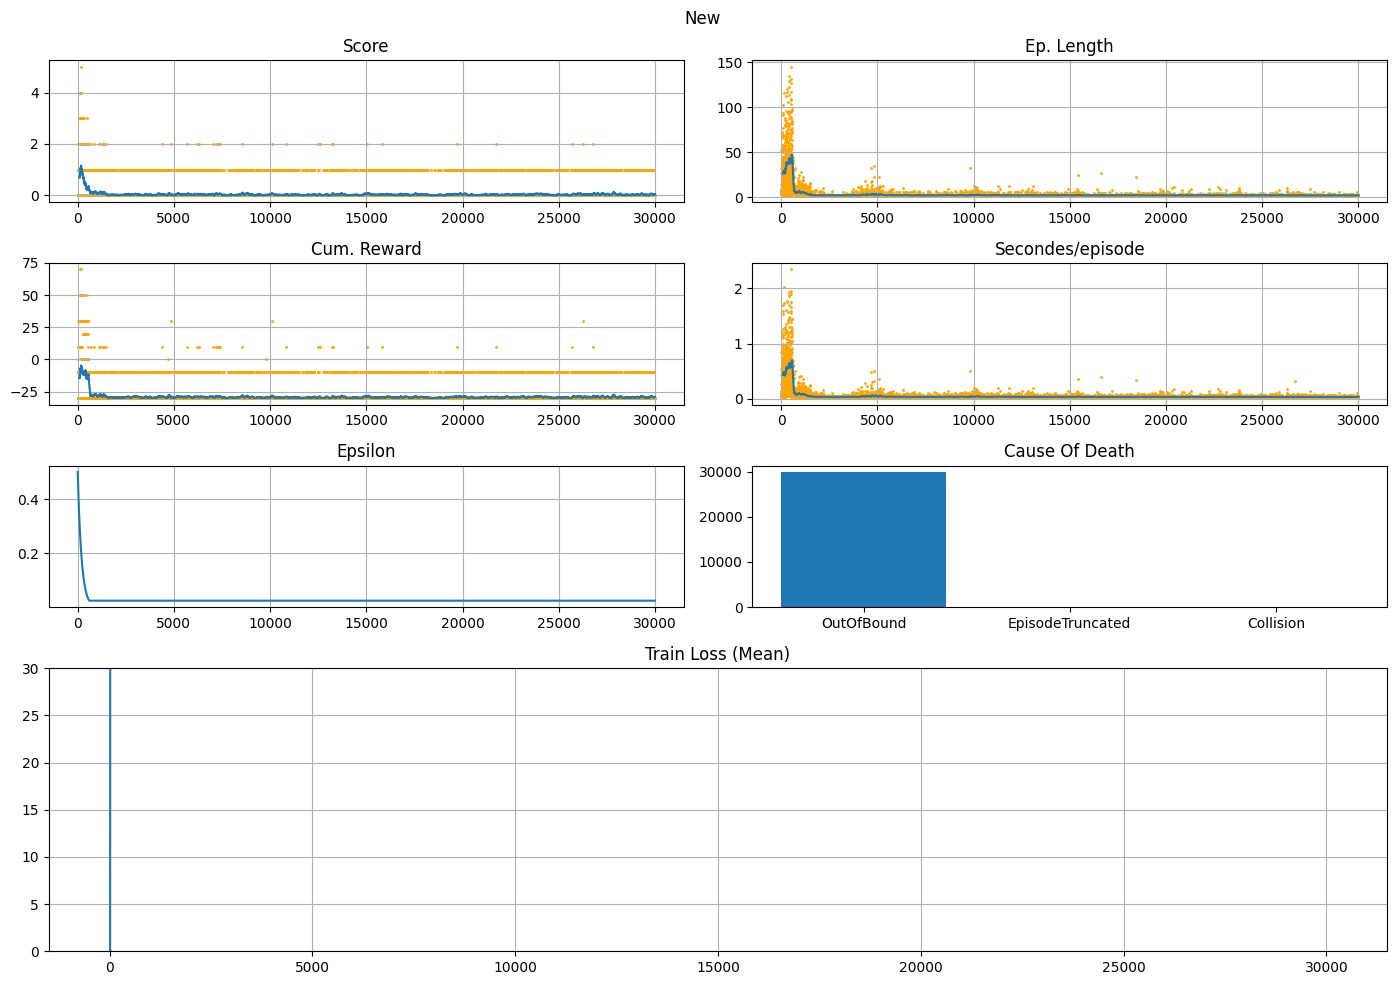

Total time: 1488.94
Max Score: 5 a 171
Max Cum. Reward: 70.0 a 143
Max Ep. Length: 145 a 506


In [9]:
def graph(df, title, ROLLING=100, ylim=30):
    layout = [
        ["A", "B"],
        ["C", "D"],
        ["E", "F"],
        ["Z", "Z"]
    ]

    fig, ax = plt.subplot_mosaic(layout, figsize=(14, 10), height_ratios=[1, 1, 1, 2])

    ax["A"].plot(df.Episode, df.Score.rolling(ROLLING).mean())
    ax["A"].scatter(df.Episode, df.Score, s=1, color="orange")
    ax["A"].set_title("Score")
    ax["A"].grid()

    ax["B"].plot(df.Episode, df.EpisodeLength.rolling(ROLLING).mean())
    ax["B"].scatter(df.Episode, df.EpisodeLength, s=1, color="orange")
    ax["B"].set_title("Ep. Length")
    ax["B"].grid()

    ax["C"].plot(df.Episode, df.CumulativeReward.rolling(ROLLING).mean())
    ax["C"].scatter(df.Episode, df.CumulativeReward, s=1, color="orange")
    ax["C"].set_title("Cum. Reward")
    ax["C"].grid()

    ax["D"].plot(df.Episode, df.EpisodeDuration.rolling(ROLLING).mean())
    ax["D"].scatter(df.Episode, df.EpisodeDuration, s=1, color="orange")
    ax["D"].set_title("Secondes/episode")
    ax["D"].grid()

    ax["E"].plot(df.Episode, df.Epsilon)
    ax["E"].set_title("Epsilon")
    ax["E"].grid()

    if "CauseOfTermination" in df.columns:
        count = df.CauseOfTermination.value_counts()
        ax["F"].bar(count.index, count.values)
        ax["F"].set_title("Cause Of Death")

    ax["Z"].plot(df.Episode, df.TrainLossMean.rolling(ROLLING // 10).mean())
    ax["Z"].scatter(df.Episode, df.TrainLossMean, s=1, color="orange")
    ax["Z"].set_title("Train Loss (Mean)")
    ax["Z"].set_ylim([0, ylim])
    ax["Z"].grid()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    runtime = df.EpisodeDuration.sum()
    print("Total time:", round(runtime, 2))
    print("Max Score:", df.Score.max(), "a", df.Score.argmax())
    print("Max Cum. Reward:", df.CumulativeReward.max().round(3), "a", df.CumulativeReward.argmax())
    print("Max Ep. Length:", df.EpisodeLength.max(), "a", df.EpisodeLength.argmax())

graph(df_base, "Base")
graph(df, "New")